In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\LOQ\\Downloads\\WHR-2024-5CS037.csv")

1. Data Exploration and Understanding:
   
• Dataset Overview:

1. Load the dataset and display the first 10 rows.
   
3. Identify the number of rows and columns in the dataset.

   
5. List all the columns and their data types.

In [14]:
df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [5]:
df.shape

(143, 9)

In [16]:
df.columns

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [12]:
df.dtypes

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.
                                                     
2. Identify the country with the highest and lowest happiness scores.

In [20]:
print(df['score'].mean())
print(df['score'].median())
print(df['score'].std())

5.52758041958042
5.785
1.1707165099442993


In [27]:
df['score'].sort_values()

142    1.721
141    2.707
140    3.186
139    3.245
138    3.295
       ...  
4      7.341
3      7.344
2      7.525
1      7.583
0      7.741
Name: score, Length: 143, dtype: float64

In [25]:
df['score'].sort_values().max()

np.float64(7.741)

In [26]:
df['score'].sort_values().min()

np.float64(1.721)

Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [28]:
df.isna().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.
   
3. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [30]:
df_score = df[df['score']>7.5]
df_score.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [33]:
df_score = df_score.sort_values(by='Log GDP per capita', ascending=False)
df_score.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Adding New Columns:

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [35]:
df['happiness_category'] = pd.cut(
    df['score'],
    bins=[0,4,7, float('inf')],
    labels=['low', 'medium', 'high']
)
df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness_category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,high
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,high
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,high
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,high
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,high
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,low


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
    
• Plot a histogram for the Score column to show its distribution and also interpret.
    
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

In [51]:
happy_country = df.sort_values(by='score', ascending=False)

top_10 = happy_country.head(10)
top_10

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness_category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,high
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,high
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,high
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,high
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,high
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,high
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,high
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,high
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,high
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,high


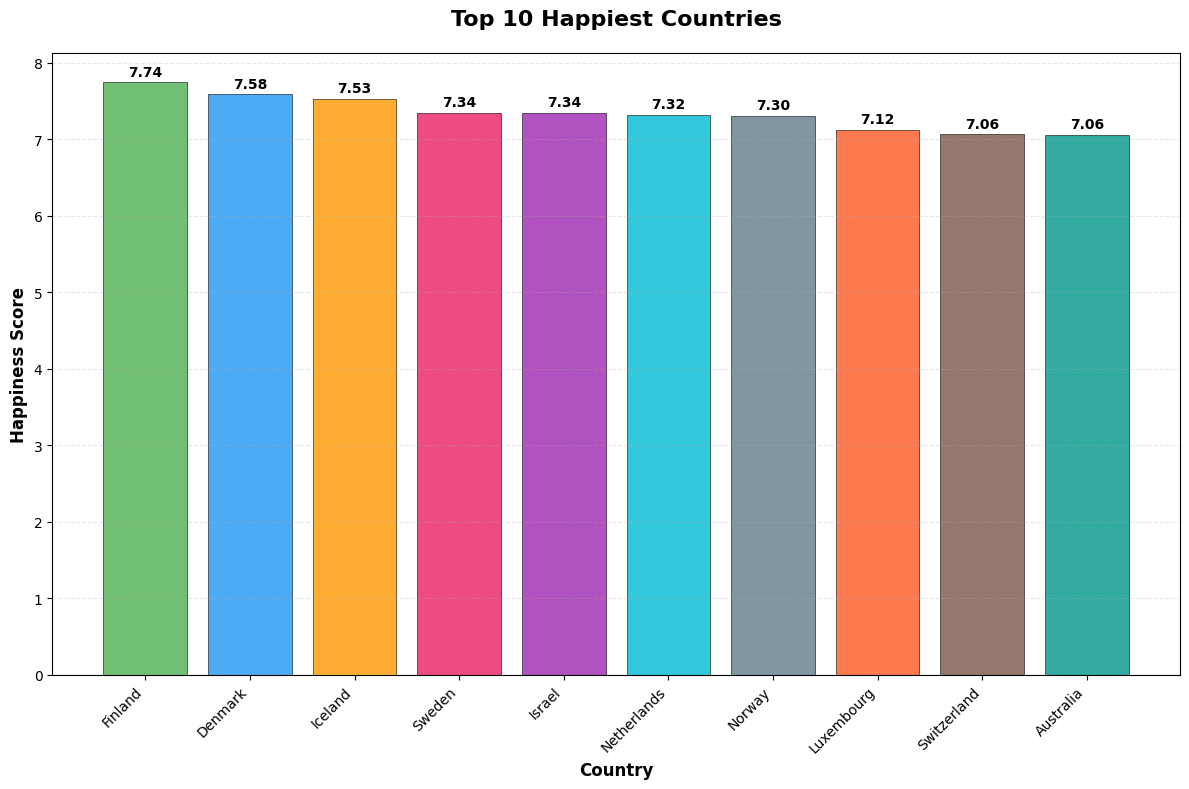

In [56]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10['Country name'], top_10['score'], 
               color=['#4CAF50', '#2196F3', '#FF9800', '#E91E63', '#9C27B0',
                      '#00BCD4', '#607D8B', '#FF5722', '#795548', '#009688'],
               edgecolor='black', linewidth=0.5, alpha=0.8)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, fontweight='bold')
plt.title('Top 10 Happiest Countries', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
unhappy_country = df.sort_values(by='score')
top_10_sad = unhappy_country.head(10)
top_10_sad

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness_category
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,low
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,low
137,Zimbabwe,3.341,0.748,0.850,0.232,0.487,0.096,0.131,0.797,low
136,Botswana,3.383,1.445,0.969,0.241,0.567,0.014,0.082,0.066,low
135,Malawi,3.421,0.617,0.410,0.349,0.571,0.135,0.136,1.203,low
134,Eswatini,3.502,1.255,0.925,0.176,0.284,0.059,0.116,0.686,low
133,Zambia,3.502,0.899,0.809,0.264,0.727,0.168,0.109,0.526,low


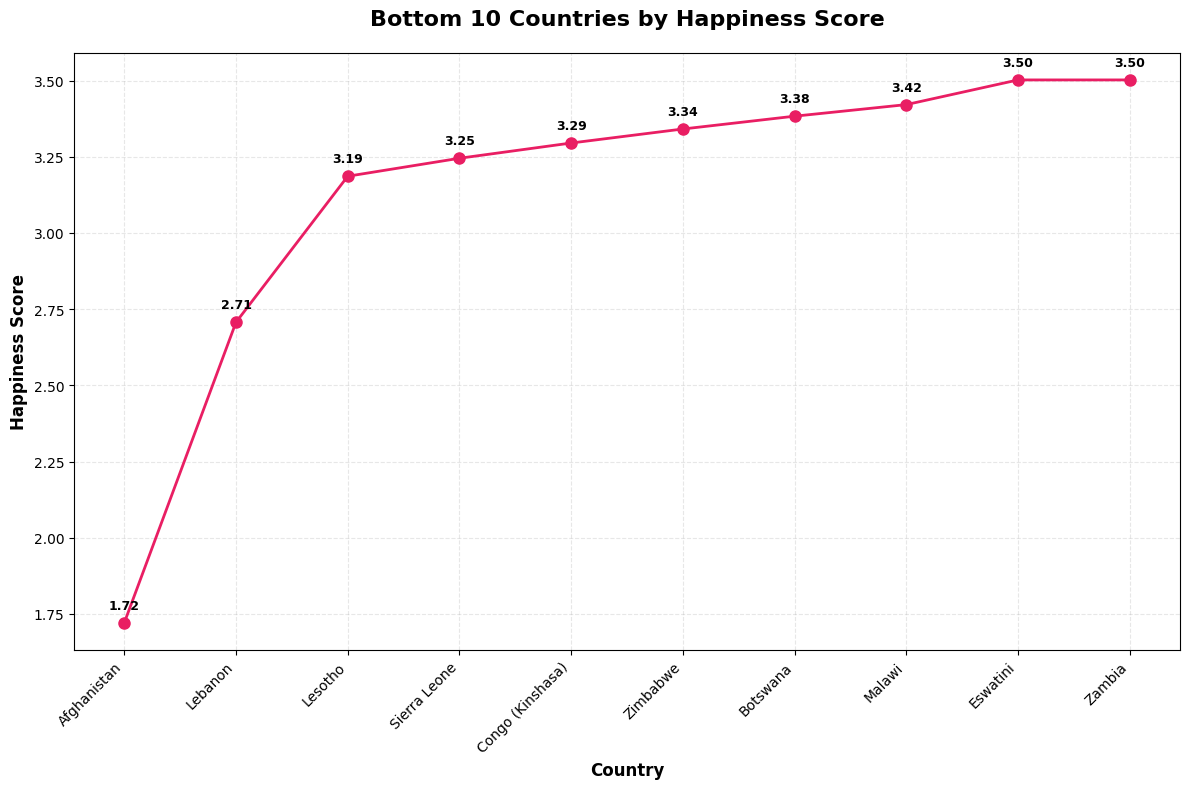

In [65]:
plt.figure(figsize=(12, 8))

# Use plt.plot() for line plot
plt.plot(top_10_sad['Country name'], top_10_sad['score'], 
         marker='o', linewidth=2, markersize=8, color='#E91E63')

# Customize the plot
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, fontweight='bold')
plt.title('Bottom 10 Countries by Happiness Score', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add value labels on data points
for i, (country, score) in enumerate(zip(top_10_sad['Country name'], top_10_sad['score'])):
    plt.annotate(f'{score:.2f}', (i, score), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, fontweight='bold')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

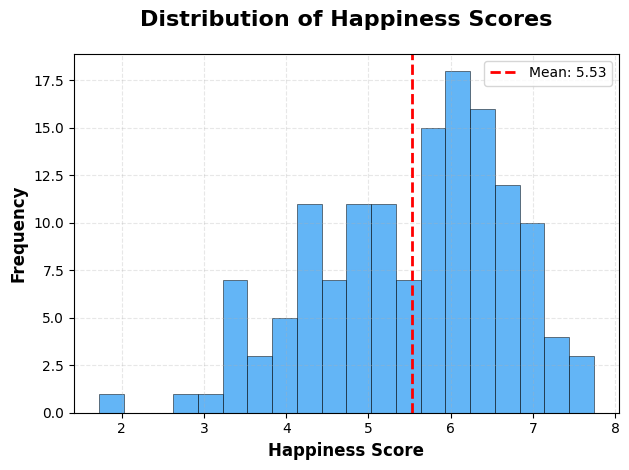

In [67]:
n, bins, patches = plt.hist(df['score'], bins=20, color='#2196F3', 
                           alpha=0.7, edgecolor='black', linewidth=0.5)

# Customize the plot
plt.xlabel('Happiness Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Happiness Scores', fontsize=16, fontweight='bold', pad=20)

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add statistics to the plot
mean_score = df['score'].mean()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_score:.2f}')

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

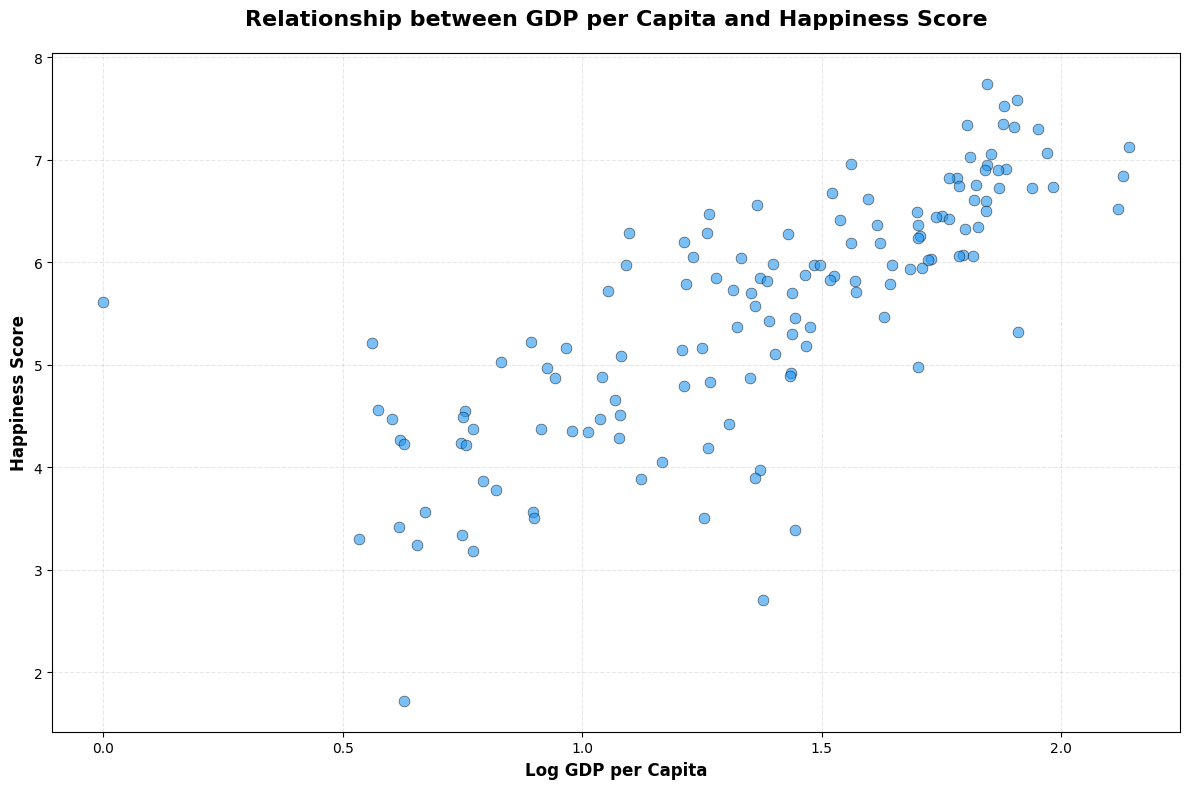

In [70]:
plt.figure(figsize=(12, 8))

# Plot with better styling
plt.scatter(df['Log GDP per capita'], df['score'], 
           alpha=0.6, color='#2196F3', s=60, edgecolors='black', linewidth=0.5)

# Customize the plot
plt.xlabel('Log GDP per Capita', fontsize=12, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, fontweight='bold')
plt.title('Relationship between GDP per Capita and Happiness Score', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()